# Import library

In [118]:
!pip install transformers

In [119]:
!pip install torch torchvision

In [120]:
import time
import datetime
import gc
import random
import re
from pathlib import Path
import pandas as pd
import numpy as np
from tabulate import tabulate
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler,random_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

import transformers
from transformers import BertForSequenceClassification, AdamW, BertConfig,BertTokenizer,get_linear_schedule_with_warmup

# Load datasets

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
path_cnn = Path("drive/MyDrive/lomba starcore/datasets/hoax/dataset_cnn_10k_cleaned.xlsx")
path_kompas = Path("drive/MyDrive/lomba starcore/datasets/hoax/dataset_kompas_4k_cleaned.xlsx")
path_tempo = Path("drive/MyDrive/lomba starcore/datasets/hoax/dataset_tempo_6k_cleaned.xlsx")
path_turnBackHoax = Path("drive/MyDrive/lomba starcore/datasets/hoax/dataset_turnbackhoax_10_cleaned.xlsx")

### CNN dataset

In [123]:
df_cnn =pd.read_excel(path_cnn)
df_cnn

,Unnamed: 0,Title,Timestamp,FullText,Tags,Author,Url,text_new,hoax
0,0,Anies di Milad BKMT: Pengajian Menghasilkan Ib...,"Selasa, 21 Feb 2023 21:22 WIB","Jakarta, CNN Indonesia -- Mantan Gubernur DKI ...",anies baswedan;pengajian;pilpres 2024;badan ko...,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...,Anies di Milad BKMT: Pengajian Menghasilkan Ib...,0
1,1,Edy Soal Pilgub Sumut: Kalau yang Maju Abal-ab...,"Selasa, 21 Feb 2023 20:46 WIB","Medan, CNN Indonesia -- Gubernur Sumatera Utar...",edy rahmayadi;pemilu 2024;pilkada 2024,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...,Edy Soal Pilgub Sumut: Kalau yang Maju Abal-ab...,0
2,2,PKB Bakal Daftarkan Menaker Ida Fauziyah Jadi ...,"Selasa, 21 Feb 2023 20:33 WIB","Jakarta, CNN Indonesia -- Partai Kebangkitan B...",ida fauziyah;pkb;pemilu 2024;pileg 2024,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...,PKB Bakal Daftarkan Menaker Ida Fauziyah Jadi ...,0
3,3,Gede Pasek Doakan AHY Jadi Capres atau Cawapres,"Selasa, 21 Feb 2023 19:58 WIB","Jakarta, CNN Indonesia -- Ketua Umum Partai Ke...",gede pasek suardika;ahy;pilpres 2024;pemilu 20...,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...,Gede Pasek Doakan AHY Jadi Capres atau Cawapre...,0
4,4,PKN Siapkan Jabatan Khusus Buat Anas Urbaningr...,"Selasa, 21 Feb 2023 18:56 WIB","Jakarta, CNN Indonesia -- Dewan Pimpinan Pusat...",anas urbaningrum;pkn;pemilu 2024,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...,PKN Siapkan Jabatan Khusus Buat Anas Urbaningr...,0
...,...,...,...,...,...,...,...,...,...
9625,9994,Aroma Politik di Balik Penetapan 1 Juni Hari L...,"Selasa, 01 Jun 2021 11:56 WIB","Jakarta, CNN Indonesia -- Tanggal 1 Juni ditet...",pancasila;hari lahir pancasila;hari pancasila;...,CNN Indonesia,https://www.cnnindonesia.com/nasional/20210531...,Aroma Politik di Balik Penetapan 1 Juni Hari L...,0
9626,9995,Jokowi Wanti-wanti Ekspansi Ideologi Transnasi...,"Selasa, 01 Jun 2021 11:07 WIB","Jakarta, CNN Indonesia -- Presiden Joko Widodo...",jokowi;hari lahir pancasila;5g;ideologi,ulf | CNN Indonesia,https://www.cnnindonesia.com/nasional/20210601...,Jokowi Wanti-wanti Ekspansi Ideologi Transnasi...,0
9627,9996,PBNU: Tak ada Pertentangan antara Islam dan Pa...,"Selasa, 01 Jun 2021 10:40 WIB","Jakarta, CNN Indonesia -- Di momen Hari Lahir ...",pbnu;hari lahir pancasila,ryh | CNN Indonesia,https://www.cnnindonesia.com/nasional/20210601...,PBNU: Tak ada Pertentangan antara Islam dan Pa...,0
9628,9997,Jokowi Bicara Ideologi Transnasional di Revolu...,"Selasa, 01 Jun 2021 10:06 WIB","Jakarta, CNN Indonesia -- Presiden Joko Widodo...",pancasila;jokowi,ulf | CNN Indonesia,https://www.cnnindonesia.com/nasional/20210601...,Jokowi Bicara Ideologi Transnasional di Revolu...,0


### Kompas dataset

In [124]:
df_kompas =pd.read_excel(path_kompas)
df_kompas

,Unnamed: 0,Title,Timestamp,FullText,Tags,Author,Url,text_new,hoax
0,0,"Efek Ekor Jas Pencalonan Anies, Elektabilitas ...","21 Februari 2023, 15:30 WIB",Hasil jajak pendapat yang diselenggarakan Litb...,Survei Litbang Kompas;Elektabilitas Nasdem Nai...,NaN,https://video.kompas.com/watch/258152/efek-eko...,"Efek Ekor Jas Pencalonan Anies, Elektabilitas ...",0
1,1,"Ekonomi 2024 Ditargetkan Tumbuh 5,7 Persen, pa...","Kompas.com - 21/02/2023, 14:22 WIB","JAKARTA, KOMPAS.com - Pemerintah menargetkan p...",Jakarta;Ekonomi 2024,Penulis Yohana Artha Uly | Editor Aprillia Ika,http://money.kompas.com/read/2023/02/21/142238...,"Ekonomi 2024 Ditargetkan Tumbuh 5,7 Persen, pa...",0
2,2,"Survei Litbang Kompas: PDI-P, Gerindra, dan Go...","21 Februari 2023, 09:58 WIB","PDI-Perjuangan, Partai Gerindra, dan Partai Go...",Pdip;Pdi Perjuangan;Gerindra;Golkar;Demokrat;N...,NaN,https://video.kompas.com/watch/257988/survei-l...,"Survei Litbang Kompas: PDI-P, Gerindra, dan Go...",0
3,3,"Survei Litbang ""Kompas"": Popularitas Golkar Te...","Kompas.com - 21/02/2023, 05:23 WIB","JAKARTA, KOMPAS.com - Survei Litbang Kompas Ja...",Litbang Kompas;survei kepemimpinan nasional;su...,Penulis Tatang Guritno | Editor Bagus Santosa,http://nasional.kompas.com/read/2023/02/21/052...,"Survei Litbang ""Kompas"": Popularitas Golkar Te...",0
4,4,"""Endorsement"" dan Basa-basi Politik ala Jokowi...","Kompas.com - 21/02/2023, 05:20 WIB","JAKARTA, KOMPAS.com - Presiden Joko Widodo la...",capres pemilu 2024;jokowi dukung ganjar;jokowi...,Penulis Fitria Chusna Farisa | Editor Fitria C...,http://nasional.kompas.com/read/2023/02/21/052...,"""Endorsement"" dan Basa-basi Politik ala Jokowi...",0
...,...,...,...,...,...,...,...,...,...
4745,4745,Nurul Arifin Ajak Perempuan Terjun ke Dunia Po...,"Kompas.com - 21/04/2017, 16:41 WIB","JAKARTA, KOMPAS.com - Ketua DPP Partai Golkar ...",Kartini;Film Kartini;RA Kartini;Nurul Arifin,Penulis Ihsanuddin | EditorInggried Dwi Wedhas...,http://nasional.kompas.com/read/2017/04/21/164...,Nurul Arifin Ajak Perempuan Terjun ke Dunia Po...,0
4746,4746,Kebangkitan Lawan Politik Jokowi...,"Kompas.com - 21/04/2017, 11:33 WIB","JAKARTA, KOMPAS.com - Pasangan Anies Baswedan-...",Pilpres 2019;Prabowo Subianto;Jokowi,Penulis Ihsanuddin | EditorSandro Gatra,http://nasional.kompas.com/read/2017/04/21/113...,Kebangkitan Lawan Politik Jokowi... Pasangan ...,0
4747,4747,Ridwan Kamil Akui Pilkada DKI Berdampak pada S...,"Kompas.com - 20/04/2017, 16:45 WIB","BANDUNG, KOMPAS.com - Wali Kota Bandung Ridwan...",Ridwan Kamil;Pilkada DKI,"Penulis Kontributor Bandung, Dendi Ramdhani | ...",http://regional.kompas.com/read/2017/04/20/164...,Ridwan Kamil Akui Pilkada DKI Berdampak pada S...,0
4748,4748,Anies Belum Berpikir Apakah Akan Menjadi Anggo...,"Kompas.com - 20/04/2017, 14:41 WIB","JAKARTA, KOMPAS.com - Calon gubernur DKI Jakar...",Anies Baswedan-Sandiaga Uno,Penulis David Oliver Purba | EditorEgidius Pat...,http://megapolitan.kompas.com/read/2017/04/20/...,Anies Belum Berpikir Apakah Akan Menjadi Anggo...,0


### Tempo dataset

In [125]:
df_tempo =pd.read_excel(path_tempo)
df_tempo

,Unnamed: 0,Title,Timestamp,FullText,Tags,Author,Url,text_new,hoax
0,0,Ma'ruf Amin akan Saksikan Lagi Timnas Indonesi...,"Sabtu, 1 Januari 2022 17:14 WIB","TEMPO.CO, Jakarta - Wakil Presiden Ma'ruf Amin...",Ma'ruf Amin;Piala AFF 2020;Indonesia vs Thaila...,Reporter Egi Adyatama Editor Aditya Budiman,https://nasional.tempo.co/read/1545504/maruf-a...,Ma'ruf Amin akan Saksikan Lagi Timnas Indonesi...,0
1,1,Menag Yaqut Canangkan 2022 Sebagai Tahun Toler...,"Sabtu, 1 Januari 2022 15:05 WIB","TEMPO.CO, Jakarta - Menteri Agama Yaqut Cholil...",Menag;Yaqut Cholil Qoumas;Gus Yaqut;Toleransi;...,Reporter Egi Adyatama Editor Aditya Budiman,https://nasional.tempo.co/read/1545477/menag-y...,Menag Yaqut Canangkan 2022 Sebagai Tahun Toler...,0
2,2,Jokowi Ajak Masyarakat Hadapi 2022 dengan Sema...,"Sabtu, 1 Januari 2022 12:05 WIB","TEMPO.CO, Jakarta - Presiden Joko Widodo atau ...",Jokowi;2022;Pandemi Covid-19;Resesi,Reporter Antara Editor Eko Ari Wibowo,https://nasional.tempo.co/read/1545437/jokowi-...,Jokowi Ajak Masyarakat Hadapi 2022 dengan Sema...,0
3,3,"Top Nasional: Strategi Hadapi Omicron, Lemhana...","Sabtu, 1 Januari 2022 07:28 WIB","TEMPO.CO, Jakarta - Berita yang banyak menarik...",Omicron;Lemhanas;Kemenkes;WHO;Agus Widjojo,Reporter Tempo.co Editor Eko Ari Wibowo,https://nasional.tempo.co/read/1545377/top-nas...,"Top Nasional: Strategi Hadapi Omicron, Lemhana...",0
4,4,"Mulai Tahun Ini, Menteri Tjahjo Kumolo Minta P...","Sabtu, 1 Januari 2022 07:02 WIB","TEMPO.CO, Jakarta - Menteri Pendayagunaan Apar...",Tjahjo Kumolo;Menpan RB;ASN;PNS;protokol keseh...,Reporter Friski Riana Editor Syailendra Persada,https://nasional.tempo.co/read/1545310/mulai-t...,"Mulai Tahun Ini, Menteri Tjahjo Kumolo Minta P...",0
...,...,...,...,...,...,...,...,...,...
6587,6587,5 Fakta dan Kasak-kusuk Jabatan Gubernur Diusu...,"Sabtu, 4 Februari 2023 10:10 WIB","TEMPO.CO, Jakarta -Wakil Ketua DPR RI Muhaimin...",Gubernur;Gubernur Jawa Barat;Ridwan Kamil;Sult...,Reporter Hendrik Khoirul Muhid Editor Dwi Arjanto,https://nasional.tempo.co/read/1687515/5-fakta...,5 Fakta dan Kasak-kusuk Jabatan Gubernur Diusu...,0
6588,6588,Komentari soal PDIP Enggan Berkoalisi dengan P...,"Sabtu, 4 Februari 2023 08:36 WIB","TEMPO.CO, Jakarta - Ketua DPP Partai NasDem Wi...",PDIP;NasDem;Impor;Hasto;Syahrul Yasin Limpo,Reporter Ima Dini Shafira Editor Eko Ari Wibowo,https://nasional.tempo.co/read/1687528/komenta...,Komentari soal PDIP Enggan Berkoalisi dengan P...,0
6589,6589,Top Nasional: NasDem Bilang Piagam Deklarasi K...,"Sabtu, 4 Februari 2023 07:54 WIB","TEMPO.CO, Jakarta - Berita yang menarik perhat...",Koalisi Perubahan;NasDem;PKS;Surya Paloh;Luhut,Reporter Tempo.co Editor Eko Ari Wibowo,https://nasional.tempo.co/read/1687524/top-nas...,Top Nasional: NasDem Bilang Piagam Deklarasi K...,0
6590,6590,NasDem Sebut Demokrat Tak Ngotot Sodorkan AHY ...,"Sabtu, 4 Februari 2023 06:50 WIB","TEMPO.CO, Jakarta - Ketua DPP Partai NasDem Su...",AHY;Anies;Demokrat;NasDem;Pilpres 2024,Reporter Ima Dini Shafira Editor Eko Ari Wibowo,https://nasional.tempo.co/read/1687513/nasdem-...,NasDem Sebut Demokrat Tak Ngotot Sodorkan AHY ...,0


### Turn Back Hoax dataset

In [126]:
df_turnBackHoax =pd.read_excel(path_turnBackHoax)
df_turnBackHoax

,Unnamed: 0,Title,Timestamp,FullText,Tags,Author,Url,politik,Narasi,Clean Narasi,hoax
0,0,[SALAH] Anies Baswedan Dekat Dengan Aliran Krs...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-anies...,1,\n“BISA DILIHAT SI ONTA YAMAN NGGAK PEDULI ITU...,BISA DILIHAT SI ONTA YAMAN NGGAK PEDULI ITU AP...,1
1,1,[SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-hakim...,0,\n“ini bener gasih?? Ya Allah gimna keadaan pa...,ini bener gasih?? Ya Allah gimna keadaan pa ha...,1
2,2,[SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-gamba...,1,\n“Nenek lampir pemimpin partai banteng bercul...,Nenek lampir pemimpin partai banteng bercula s...,1
3,3,[SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-jonat...,0,\n“gerombolan kulup banyak menyusup ke ormas2 ...,gerombolan kulup banyak menyusup ke ormas2 isl...,1
4,4,[SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-pesan...,1,,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
10376,10379,(HOAX) Foto Raja Salman Mengangkat Tandu Jenaz...,2015-09-15 00:00:00,Sumber : media sosial\nNarasi : Raja Salman da...,Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/15/hoax-foto-r...,0,Raja Salman dari arab saudi membawa orang-ora...,Raja Salman dari arab saudi membawa orang-oran...,1
10377,10380,"(HOAX) Jokowi dituduh bodoh, salah cara dalam ...",2015-09-12 00:00:00,"Sumber : media sosial\nNarasi : hehe, selalu b...",Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/12/jokowi-ditu...,1,"hehe, selalu bisa tersenyum melihat tingkah l...","hehe, selalu bisa tersenyum melihat tingkah la...",1
10378,10381,(FITNAH) Jokowi dituduh memasukkan ribuan tena...,2015-09-08 00:00:00,Sumber : Media Sosial\nNarasi : Pak Jokowi itu...,Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/08/jokowi-ditu...,1,Pak Jokowi itu menjadi walikota periode perta...,Pak Jokowi itu menjadi walikota periode pertam...,1
10379,10382,(HOAX) Mata Uang Rupiah Terpuruk,2015-09-08 00:00:00,"Sumber : media sosial\nNarasi : Hari ini, Rabu...",Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/08/mata-uang-r...,0,"Hari ini, Rabu (23/09/2015), nilai tukar rupi...","Hari ini, Rabu (23/09/2015), nilai tukar rupia...",1


# Data Cleaning

Rename column name 'Clean Narasi' to 'text_new' and drop column 'politik'

In [127]:
df_turnBackHoax= df_turnBackHoax.rename(columns={'Clean Narasi': 'text_new'})
df_turnBackHoax = df_turnBackHoax.drop('Narasi', axis=1)
df_turnBackHoax = df_turnBackHoax.drop('politik', axis=1)
df_turnBackHoax

,Unnamed: 0,Title,Timestamp,FullText,Tags,Author,Url,text_new,hoax
0,0,[SALAH] Anies Baswedan Dekat Dengan Aliran Krs...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-anies...,BISA DILIHAT SI ONTA YAMAN NGGAK PEDULI ITU AP...,1
1,1,[SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-hakim...,ini bener gasih?? Ya Allah gimna keadaan pa ha...,1
2,2,[SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-gamba...,Nenek lampir pemimpin partai banteng bercula s...,1
3,3,[SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-jonat...,gerombolan kulup banyak menyusup ke ormas2 isl...,1
4,4,[SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-pesan...,NaN,1
...,...,...,...,...,...,...,...,...,...
10376,10379,(HOAX) Foto Raja Salman Mengangkat Tandu Jenaz...,2015-09-15 00:00:00,Sumber : media sosial\nNarasi : Raja Salman da...,Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/15/hoax-foto-r...,Raja Salman dari arab saudi membawa orang-oran...,1
10377,10380,"(HOAX) Jokowi dituduh bodoh, salah cara dalam ...",2015-09-12 00:00:00,"Sumber : media sosial\nNarasi : hehe, selalu b...",Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/12/jokowi-ditu...,"hehe, selalu bisa tersenyum melihat tingkah la...",1
10378,10381,(FITNAH) Jokowi dituduh memasukkan ribuan tena...,2015-09-08 00:00:00,Sumber : Media Sosial\nNarasi : Pak Jokowi itu...,Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/08/jokowi-ditu...,Pak Jokowi itu menjadi walikota periode pertam...,1
10379,10382,(HOAX) Mata Uang Rupiah Terpuruk,2015-09-08 00:00:00,"Sumber : media sosial\nNarasi : Hari ini, Rabu...",Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/08/mata-uang-r...,"Hari ini, Rabu (23/09/2015), nilai tukar rupia...",1


Remove prefix on 'Title' column values

In [128]:
df_turnBackHoax['Title'] = df_turnBackHoax['Title'].str.replace('^\(.*?\)\s|\[.*?\]\s', '', regex=True)
df_turnBackHoax

,Unnamed: 0,Title,Timestamp,FullText,Tags,Author,Url,text_new,hoax
0,0,Anies Baswedan Dekat Dengan Aliran Krsiten Ses...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-anies...,BISA DILIHAT SI ONTA YAMAN NGGAK PEDULI ITU AP...,1
1,1,Hakim Wahyu Iman Santoso Alami Kecelakaan Tung...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-hakim...,ini bener gasih?? Ya Allah gimna keadaan pa ha...,1
2,2,GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-gamba...,Nenek lampir pemimpin partai banteng bercula s...,1
3,3,JONATHAN LATUMAHINA SEORANG NASRANI DAN PENYUS...,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-jonat...,gerombolan kulup banyak menyusup ke ormas2 isl...,1
4,4,PESAN WHATSAPP DARI BMKG YANG KABARKAN GUNUNG ...,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-pesan...,NaN,1
...,...,...,...,...,...,...,...,...,...
10376,10379,Foto Raja Salman Mengangkat Tandu Jenazah Korb...,2015-09-15 00:00:00,Sumber : media sosial\nNarasi : Raja Salman da...,Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/15/hoax-foto-r...,Raja Salman dari arab saudi membawa orang-oran...,1
10377,10380,"Jokowi dituduh bodoh, salah cara dalam bersala...",2015-09-12 00:00:00,"Sumber : media sosial\nNarasi : hehe, selalu b...",Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/12/jokowi-ditu...,"hehe, selalu bisa tersenyum melihat tingkah la...",1
10378,10381,Jokowi dituduh memasukkan ribuan tenaga kerja ...,2015-09-08 00:00:00,Sumber : Media Sosial\nNarasi : Pak Jokowi itu...,Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/08/jokowi-ditu...,Pak Jokowi itu menjadi walikota periode pertam...,1
10379,10382,Mata Uang Rupiah Terpuruk,2015-09-08 00:00:00,"Sumber : media sosial\nNarasi : Hari ini, Rabu...",Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/08/mata-uang-r...,"Hari ini, Rabu (23/09/2015), nilai tukar rupia...",1


### Combine all dataset

In [129]:
df = pd.concat([df_cnn, df_kompas, df_tempo, df_turnBackHoax])
df

,Unnamed: 0,Title,Timestamp,FullText,Tags,Author,Url,text_new,hoax
0,0,Anies di Milad BKMT: Pengajian Menghasilkan Ib...,"Selasa, 21 Feb 2023 21:22 WIB","Jakarta, CNN Indonesia -- Mantan Gubernur DKI ...",anies baswedan;pengajian;pilpres 2024;badan ko...,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...,Anies di Milad BKMT: Pengajian Menghasilkan Ib...,0
1,1,Edy Soal Pilgub Sumut: Kalau yang Maju Abal-ab...,"Selasa, 21 Feb 2023 20:46 WIB","Medan, CNN Indonesia -- Gubernur Sumatera Utar...",edy rahmayadi;pemilu 2024;pilkada 2024,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...,Edy Soal Pilgub Sumut: Kalau yang Maju Abal-ab...,0
2,2,PKB Bakal Daftarkan Menaker Ida Fauziyah Jadi ...,"Selasa, 21 Feb 2023 20:33 WIB","Jakarta, CNN Indonesia -- Partai Kebangkitan B...",ida fauziyah;pkb;pemilu 2024;pileg 2024,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...,PKB Bakal Daftarkan Menaker Ida Fauziyah Jadi ...,0
3,3,Gede Pasek Doakan AHY Jadi Capres atau Cawapres,"Selasa, 21 Feb 2023 19:58 WIB","Jakarta, CNN Indonesia -- Ketua Umum Partai Ke...",gede pasek suardika;ahy;pilpres 2024;pemilu 20...,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...,Gede Pasek Doakan AHY Jadi Capres atau Cawapre...,0
4,4,PKN Siapkan Jabatan Khusus Buat Anas Urbaningr...,"Selasa, 21 Feb 2023 18:56 WIB","Jakarta, CNN Indonesia -- Dewan Pimpinan Pusat...",anas urbaningrum;pkn;pemilu 2024,CNN Indonesia,https://www.cnnindonesia.com/nasional/20230221...,PKN Siapkan Jabatan Khusus Buat Anas Urbaningr...,0
...,...,...,...,...,...,...,...,...,...
10376,10379,Foto Raja Salman Mengangkat Tandu Jenazah Korb...,2015-09-15 00:00:00,Sumber : media sosial\nNarasi : Raja Salman da...,Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/15/hoax-foto-r...,Raja Salman dari arab saudi membawa orang-oran...,1
10377,10380,"Jokowi dituduh bodoh, salah cara dalam bersala...",2015-09-12 00:00:00,"Sumber : media sosial\nNarasi : hehe, selalu b...",Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/12/jokowi-ditu...,"hehe, selalu bisa tersenyum melihat tingkah la...",1
10378,10381,Jokowi dituduh memasukkan ribuan tenaga kerja ...,2015-09-08 00:00:00,Sumber : Media Sosial\nNarasi : Pak Jokowi itu...,Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/08/jokowi-ditu...,Pak Jokowi itu menjadi walikota periode pertam...,1
10379,10382,Mata Uang Rupiah Terpuruk,2015-09-08 00:00:00,"Sumber : media sosial\nNarasi : Hari ini, Rabu...",Fitnah;Hasut;Hoax,Bentang Febrylian,https://turnbackhoax.id/2015/09/08/mata-uang-r...,"Hari ini, Rabu (23/09/2015), nilai tukar rupia...",1


### Drop unnecessary column



In [130]:
df = df.drop(['Unnamed: 0','Timestamp','Tags','Author','Url','text_new','FullText'], axis=1)
df

,Title,hoax
0,Anies di Milad BKMT: Pengajian Menghasilkan Ib...,0
1,Edy Soal Pilgub Sumut: Kalau yang Maju Abal-ab...,0
2,PKB Bakal Daftarkan Menaker Ida Fauziyah Jadi ...,0
3,Gede Pasek Doakan AHY Jadi Capres atau Cawapres,0
4,PKN Siapkan Jabatan Khusus Buat Anas Urbaningr...,0
...,...,...
10376,Foto Raja Salman Mengangkat Tandu Jenazah Korb...,1
10377,"Jokowi dituduh bodoh, salah cara dalam bersala...",1
10378,Jokowi dituduh memasukkan ribuan tenaga kerja ...,1
10379,Mata Uang Rupiah Terpuruk,1


### Check and drop null value

In [131]:
df.isnull().sum()

Title    21
hoax      0
dtype: int64

In [132]:
df = df.dropna()

In [133]:
df.isnull().sum()

Title    0
hoax     0
dtype: int64

# EDA

In [134]:
df['hoax'].value_counts()

0    20951
1    10381
Name: hoax, dtype: int64

<Axes: xlabel='hoax'>

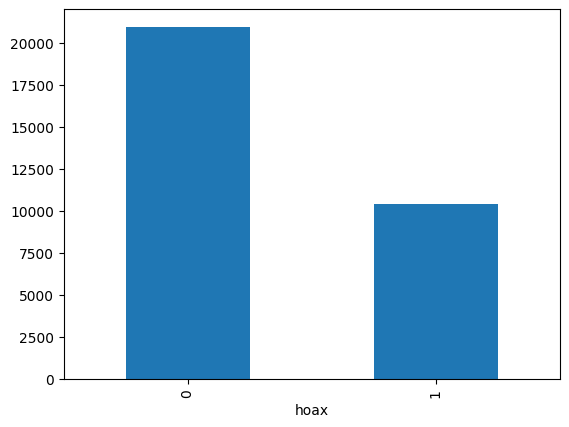

In [135]:
df.groupby('hoax').size().plot(kind='bar')

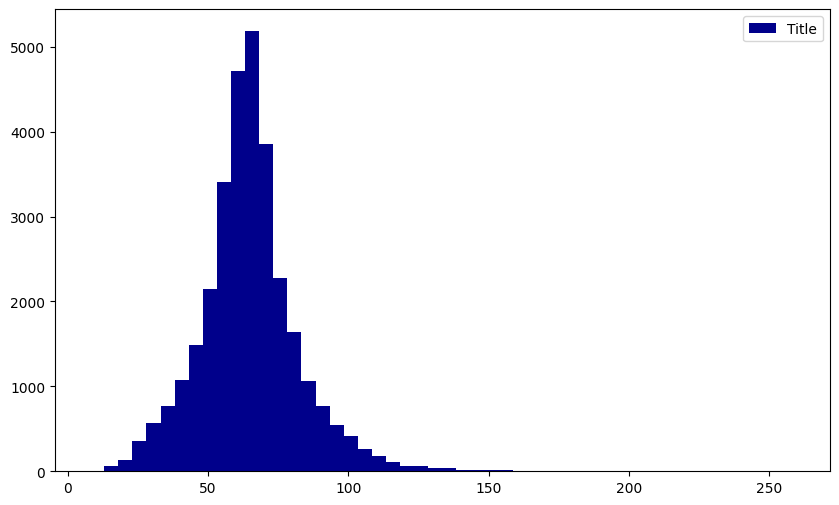

In [136]:
length_test = df['Title'].str.len()
plt.figure(figsize=(10,6))
plt.hist(length_test, bins=50, label='Title', color = "darkblue")
plt.legend()

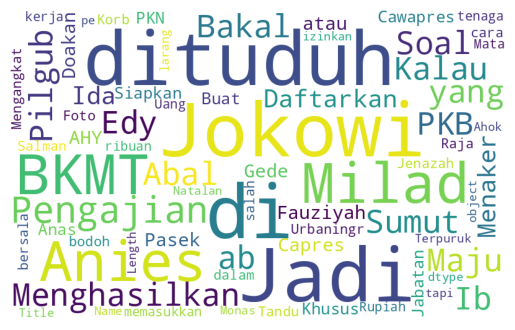

In [137]:
text = df['Title']

wordcloud = WordCloud(background_color='white',width=800, height=500,max_font_size=120,random_state=21,).generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Train test split
test dataset is used for evaluation

In [138]:
train_df, test_df = train_test_split(df, test_size=0.1, random_state=1, stratify=df['hoax'])

In [139]:
print(train_df.shape)
print(test_df.shape)

(28198, 2)
(3134, 2)


In [140]:
title = train_df.Title.values
labels = train_df.hoax.values

## BERT Tokenizer

In [141]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

In [142]:
print(' Original: ', title[0])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(title[0]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(title[0])))

 Original:  “hindari Citos byk karyawannya terpapar covid19. Area citos rawan”
Tokenized:  ['[UNK]', 'hin', '##dari', 'Ci', '##tos', 'by', '##k', 'karya', '##wan', '##nya', 'ter', '##pa', '##par', 'co', '##vid', '##19', '.', 'Area', 'cit', '##os', 'raw', '##an', '[UNK]']
Token IDs:  [100, 19911, 91902, 51457, 13318, 10155, 10174, 27270, 14394, 10676, 12718, 11359, 22786, 11170, 32194, 54055, 119, 17815, 49409, 10310, 78444, 10206, 100]


In [143]:
def print_token():
  '''Displays the tokens and respective IDs of a random text sample'''
  index = 0
  table = np.array([tokenizer.tokenize(title[index]),
                    tokenizer.convert_tokens_to_ids(tokenizer.tokenize(title[index]))]).T
  print(tabulate(table,
                 headers = ['Tokens', 'Token IDs'],
                 tablefmt = 'fancy_grid'))

print_token()

╒══════════╤═════════════╕
│ Tokens   │   Token IDs │
╞══════════╪═════════════╡
│ [UNK]    │         100 │
├──────────┼─────────────┤
│ hin      │       19911 │
├──────────┼─────────────┤
│ ##dari   │       91902 │
├──────────┼─────────────┤
│ Ci       │       51457 │
├──────────┼─────────────┤
│ ##tos    │       13318 │
├──────────┼─────────────┤
│ by       │       10155 │
├──────────┼─────────────┤
│ ##k      │       10174 │
├──────────┼─────────────┤
│ karya    │       27270 │
├──────────┼─────────────┤
│ ##wan    │       14394 │
├──────────┼─────────────┤
│ ##nya    │       10676 │
├──────────┼─────────────┤
│ ter      │       12718 │
├──────────┼─────────────┤
│ ##pa     │       11359 │
├──────────┼─────────────┤
│ ##par    │       22786 │
├──────────┼─────────────┤
│ co       │       11170 │
├──────────┼─────────────┤
│ ##vid    │       32194 │
├──────────┼─────────────┤
│ ##19     │       54055 │
├──────────┼─────────────┤
│ .        │         119 │
├──────────┼─────────────┤
│

In [144]:
max_len = 0

# For every sentence...
for ttl in title:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(ttl, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Max sentence length:  91


In [145]:
input_ids = []
attention_masks = []

# For every txt...
for txt in title:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        txt,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = max_len,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', title[0])
print('Token IDs:', input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2393: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  “hindari Citos byk karyawannya terpapar covid19. Area citos rawan”
Token IDs: tensor([  101,   100, 19911, 91902, 51457, 13318, 10155, 10174, 27270, 14394,
        10676, 12718, 11359, 22786, 11170, 32194, 54055,   119, 17815, 49409,
        10310, 78444, 10206,   100,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0])


In [146]:
def print_attention_token():
  '''Displays tokens, token IDs and attention mask of a random text sample'''
  index = 0
  tokens = tokenizer.tokenize(tokenizer.decode(input_ids[index]))
  token_ids = [i.numpy() for i in input_ids[index]]
  attention = [i.numpy() for i in attention_masks[index]]

  table = np.array([tokens, token_ids, attention]).T
  print(tabulate(table,
                 headers = ['Tokens', 'Token IDs', 'Attention Mask'],
                 tablefmt = 'fancy_grid'))

print_attention_token()

╒══════════╤═════════════╤══════════════════╕
│ Tokens   │   Token IDs │   Attention Mask │
╞══════════╪═════════════╪══════════════════╡
│ [CLS]    │         101 │                1 │
├──────────┼─────────────┼──────────────────┤
│ [UNK]    │         100 │                1 │
├──────────┼─────────────┼──────────────────┤
│ hin      │       19911 │                1 │
├──────────┼─────────────┼──────────────────┤
│ ##dari   │       91902 │                1 │
├──────────┼─────────────┼──────────────────┤
│ Ci       │       51457 │                1 │
├──────────┼─────────────┼──────────────────┤
│ ##tos    │       13318 │                1 │
├──────────┼─────────────┼──────────────────┤
│ by       │       10155 │                1 │
├──────────┼─────────────┼──────────────────┤
│ ##k      │       10174 │                1 │
├──────────┼─────────────┼──────────────────┤
│ karya    │       27270 │                1 │
├──────────┼─────────────┼──────────────────┤
│ ##wan    │       14394 │        

## Train-validation split
80% of data is split into train and 20% to validation sets.

In [147]:
# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.8 * len(dataset))
val_size = len(dataset)  - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

22,558 training samples
5,640 validation samples


In [148]:
# The DataLoader needs to know our batch size for training, so we specify it
# here. For fine-tuning BERT on a specific task, the authors recommend a batch
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order.
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [149]:
# Load BertForSequenceClassification, the pretrained BERT model with a single
# linear classification layer on top.
model = BertForSequenceClassification.from_pretrained(
    "bert-base-multilingual-cased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# if device == "cuda:0":
# # Tell pytorch to run this model on the GPU.
model = model.cuda()
# model = model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Fine Tuning

In [150]:
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [151]:
# Number of training epochs. The BERT authors recommend between 2 and 4.
# We chose to run for 4, but we'll see later that this may be over-fitting the
# training data.
epochs = 3

# Total number of training steps is [number of batches] x [number of epochs].
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [152]:
# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [153]:
def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [154]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [155]:
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================
    # Perform one full pass over the training set.
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')
    # Measure how long the training epoch takes.
    t0 = time.time()
    total_train_loss = 0
    model.train()
    for step, batch in enumerate(train_dataloader):
        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the device using the
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        optimizer.zero_grad()
        output = model(b_input_ids,
                             token_type_ids=None,
                             attention_mask=b_input_mask,
                             labels=b_labels)
        loss = output.loss
        total_train_loss += loss.item()
        # Perform a backward pass to calculate the gradients.
        loss.backward()
        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()
        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)

    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)
    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(training_time))
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.
    print("")
    print("Running Validation...")
    t0 = time.time()
    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()
    # Tracking variables
    total_eval_accuracy = 0
    best_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0
    # Evaluate data for one epoch
    for batch in validation_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():
            output= model(b_input_ids,
                                   token_type_ids=None,
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
        loss = output.loss
        total_eval_loss += loss.item()
        # Move logits and labels to CPU if we are using GPU
        logits = output.logits
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))
    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    if avg_val_accuracy > best_eval_accuracy:
        torch.save(model, 'bert_model')
        best_eval_accuracy = avg_val_accuracy
    #print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    #print("  Validation took: {:}".format(validation_time))
    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )
print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 3 ========
Training...

  Average training loss: 0.16
  Training epoch took: 0:05:58

Running Validation...
  Accuracy: 0.97

======== Epoch 2 / 3 ========
Training...

  Average training loss: 0.07
  Training epoch took: 0:05:59

Running Validation...
  Accuracy: 0.97

======== Epoch 3 / 3 ========
Training...

  Average training loss: 0.04
  Training epoch took: 0:05:58

Running Validation...
  Accuracy: 0.98

Training complete!
Total training took 0:19:38 (h:mm:ss)


# Evaluation

### Load best model

In [156]:
model = torch.load('bert_model')

In [157]:
test_text = test_df['Title'].values

In [158]:
test_input_ids = []
test_attention_masks = []
for txt in test_text:
    encoded_dict = tokenizer.encode_plus(
                        txt,
                        add_special_tokens = True,
                        max_length = max_len,
                        pad_to_max_length = True,
                        return_attention_mask = True,
                        return_tensors = 'pt',
                   )
    test_input_ids.append(encoded_dict['input_ids'])
    test_attention_masks.append(encoded_dict['attention_mask'])
test_input_ids = torch.cat(test_input_ids, dim=0)
test_attention_masks = torch.cat(test_attention_masks, dim=0)

In [159]:
test_dataset = TensorDataset(test_input_ids, test_attention_masks)
test_dataloader = DataLoader(
            test_dataset, # The validation samples.
            sampler = SequentialSampler(test_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [160]:
predictions = []
for batch in test_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        with torch.no_grad():
            output= model(b_input_ids,
                                   token_type_ids=None,
                                   attention_mask=b_input_mask)
            logits = output.logits
            logits = logits.detach().cpu().numpy()
            pred_flat = np.argmax(logits, axis=1).flatten()

            predictions.extend(list(pred_flat))

In [161]:
test_df['prediction'] =predictions
test_df

,Title,hoax,prediction
181,"Kaesang Ingin Terjun ke Politik, Jokowi Ogah C...",0,0
3452,"Jokowi Ungkap Capres Ideal, Relawan Sebut Iden...",0,0
1534,"Survei Populi Center, Popularitas Prabowo Subi...",0,0
1814,"Foto “Masjid Meledak Saat Waktu Sholat Jumat, ...",1,1
2113,Survei IPO: 60 Persen Tak Puas dengan Kinerja ...,0,0
...,...,...,...
3006,Video Akting Plandemi Jenazah Pasien Covid-19 ...,1,1
6833,Rencana Jadwal Pilpres 2024: Pendaftaran Capre...,0,0
3516,Kilas Balik Pendirian PAN 24 Tahun Lalu: Refor...,0,0
1001,"Klaim Punya Kedekatan dengan PPP dan PKB, PDI-...",0,0


In [162]:
target_names = ['0', '1']
print(classification_report(test_df['hoax'].values, test_df['prediction'].values, target_names=target_names))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2096
           1       0.97      0.96      0.97      1038

    accuracy                           0.98      3134
   macro avg       0.98      0.97      0.97      3134
weighted avg       0.98      0.98      0.98      3134



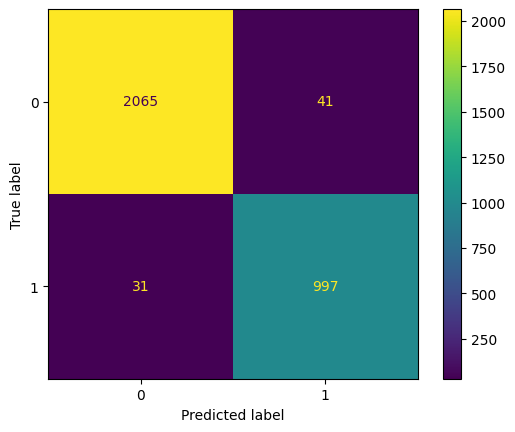

In [163]:
ConfusionMatrixDisplay.from_predictions(test_df['prediction'].values, test_df['hoax'].values);

In [164]:
test_df.to_csv('result.csv', index = False)